In [2]:
# regression
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target

In [4]:
from sklearn.feature_selection import mutual_info_regression

coef = mutual_info_regression(X, y)

In [8]:
feature_names = data.feature_names
target_name = "target"
print(coef)
print(feature_names)

[0.00018132 0.02433195 0.17520152 0.0549723  0.0676349  0.01206312
 0.06251846 0.09166585 0.14910066 0.10553532]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [17]:
coef_dict = {feature_names[i]: coef[i] for i in range(len(coef))}
# coef_dict = {}
# for i in range(len(coef)):
#     coef_dict[feature_names[i]] = coef[i]
sorted_values = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

ordered_feature_names = [x[0] for x in sorted_values]
# ordered_feature_names = []
# for x in sorted_values:
#     ordered_feature_names.append(x[0])
ordered_coef = [x[1] for x in sorted_values]
# ordered_coef = []
# for x in sorted_values:
#     ordered_coef.append(x[1])

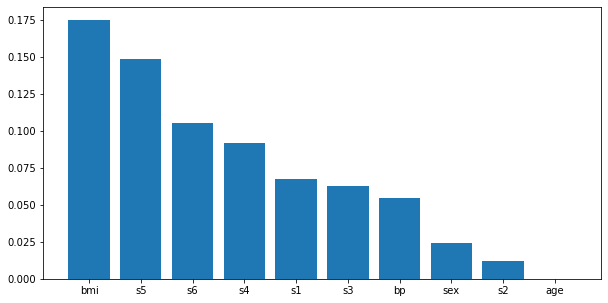

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline 

_ = plt.figure(figsize=(10, 5))
plt.bar(ordered_feature_names, ordered_coef)
plt.show()

In [58]:
import numpy as np 

ordered_coef = np.asarray(ordered_coef)
kept_features_coef = np.where(ordered_coef > 0.15)[0]
print(f"Coef features care au MI > 0.75: {kept_features_coef}")

ordered_feature_names = np.asarray(ordered_feature_names)
kept_features = ordered_feature_names[kept_features_coef]
print(f"Features for above coefs: {kept_features}")

Coef features care au MI > 0.75: [0]
Features for above coefs: ['bmi']


In [59]:
import pandas as pd
df = pd.DataFrame(X, columns=feature_names)
df = df[kept_features]
df.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
r = LinearRegression()
r = r.fit(X_train, y_train)
y_train_pred = r.predict(X_train)
y_test_pred = r.predict(X_test)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")


MSE Train: 3854.1126520758194
MSE Test: 4061.825928494928


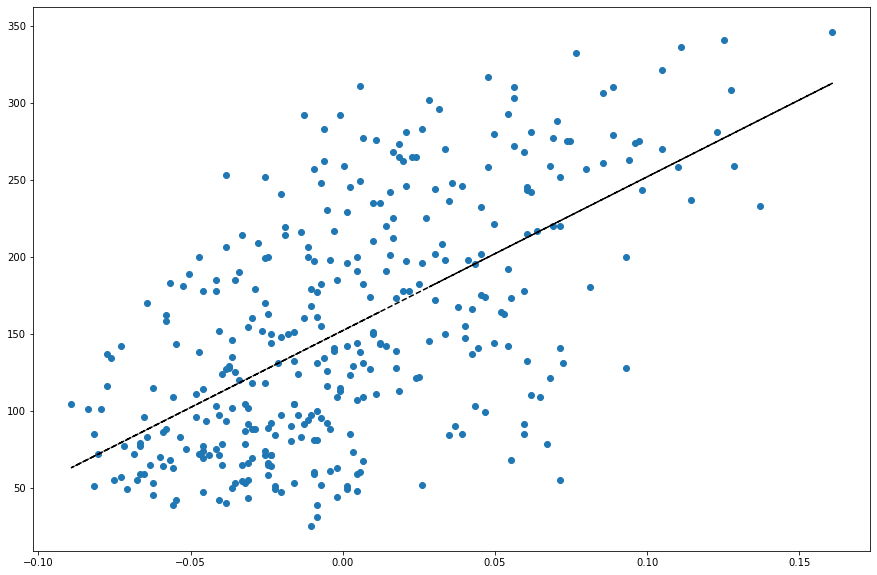

In [64]:
_ = plt.figure(figsize=(15, 10))
plt.plot(X_train, y_train_pred, 'k--')
plt.scatter(X_train, y_train)
plt.show()

In [65]:
# classification
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target